# K-Means Clustering Tutorial

This notebook demonstrates K-Means clustering on three datasets: Iris, Wine, and WeatherAUS.

---

## Learning Outcomes
- Understand K-Means clustering and its application to real datasets.
- Preprocess data for clustering.
- Evaluate clustering results with respect to known labels.
- Reflect on legal, social, ethical, and professional issues in machine learning.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns


## Task A: K-Means Clustering on Iris Dataset


In [2]:
# Load Iris data
iris = pd.read_csv('Unit06 iris.csv')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Remove non-numeric columns (keep only features)
iris_features = iris.select_dtypes(include=[np.number])
# Store true labels for comparison
if 'species' in iris.columns:
    iris_labels = iris['species']
else:
    iris_labels = None
# Standardize features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_features)
# KMeans with K=3
kmeans_iris = KMeans(n_clusters=3, random_state=42)
iris_clusters = kmeans_iris.fit_predict(iris_scaled)
# Add clusters to DataFrame
iris['Cluster'] = iris_clusters
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,1


In [4]:
# Compare clusters with actual species labels (if available)
if iris_labels is not None:
    # Encode labels numerically
    le = LabelEncoder()
    true_labels = le.fit_transform(iris_labels)
    cm = confusion_matrix(true_labels, iris_clusters)
    print('Confusion Matrix:')
    print(cm)
    # Cluster-label mapping for best alignment
    from scipy.stats import mode
    cluster_map = {}
    for i in range(3):
        mask = (iris_clusters == i)
        if np.any(mask):
            cluster_map[i] = mode(true_labels[mask], keepdims=True)[0][0]
    pred_labels = np.array([cluster_map[c] for c in iris_clusters])
    print('Cluster Accuracy:', accuracy_score(true_labels, pred_labels))


Confusion Matrix:
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]
Cluster Accuracy: 0.6666666666666666


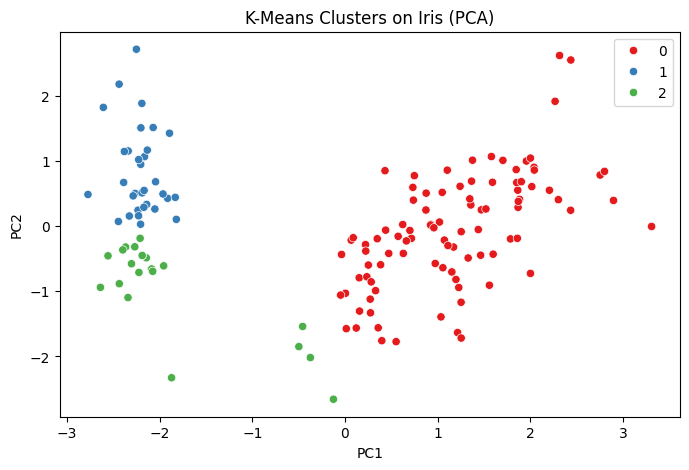

In [5]:
# PCA for 2D visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
plt.figure(figsize=(8,5))
sns.scatterplot(x=iris_pca[:,0], y=iris_pca[:,1], hue=iris_clusters, palette='Set1', legend='full')
plt.title('K-Means Clusters on Iris (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Task B: K-Means Clustering on Wine Dataset


In [6]:
# Load Wine data
wine = pd.read_csv('Unit06 wine.csv')
wine.head()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Remove non-numeric columns and ID columns
wine_features = wine.select_dtypes(include=[np.number])
# Remove the target label column if present
if 'Class' in wine.columns:
    wine_labels = wine['Class']
    wine_features = wine_features.drop(columns=['Class'])
else:
    wine_labels = None
# Standardize features
wine_scaled = scaler.fit_transform(wine_features)
# KMeans with K=3
kmeans_wine = KMeans(n_clusters=3, random_state=42)
wine_clusters = kmeans_wine.fit_predict(wine_scaled)
wine['Cluster'] = wine_clusters
wine.head()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [8]:
# Compare clusters with actual wine classes (if available)
if wine_labels is not None:
    true_labels = wine_labels - 1  # Classes are usually 1,2,3
    cm = confusion_matrix(true_labels, wine_clusters)
    print('Confusion Matrix:')
    print(cm)
    cluster_map = {}
    for i in range(3):
        mask = (wine_clusters == i)
        if np.any(mask):
            cluster_map[i] = mode(true_labels[mask], keepdims=True)[0][0]
    pred_labels = np.array([cluster_map[c] for c in wine_clusters])
    print('Cluster Accuracy:', accuracy_score(true_labels, pred_labels))


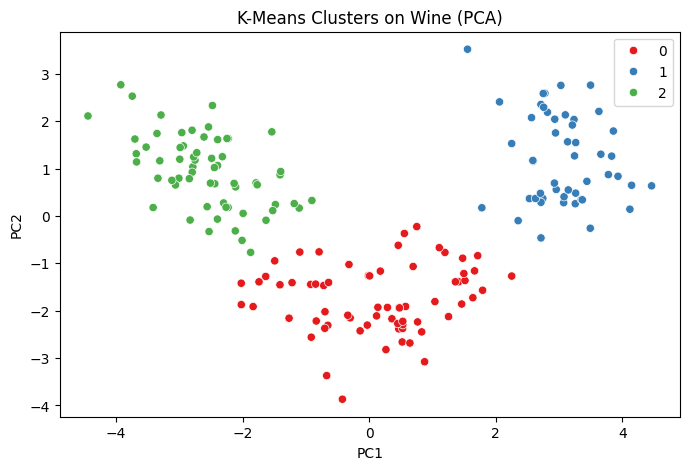

In [9]:
# PCA for 2D visualization
wine_pca = pca.fit_transform(wine_scaled)
plt.figure(figsize=(8,5))
sns.scatterplot(x=wine_pca[:,0], y=wine_pca[:,1], hue=wine_clusters, palette='Set1', legend='full')
plt.title('K-Means Clusters on Wine (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Task C: K-Means Clustering on WeatherAUS Dataset


In [10]:
# Load WeatherAUS data
weather = pd.read_csv('Unit06 weatherAUS.csv')
weather.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


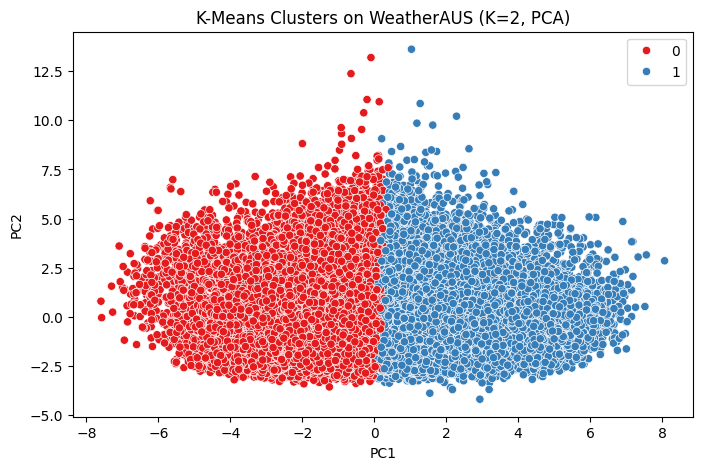

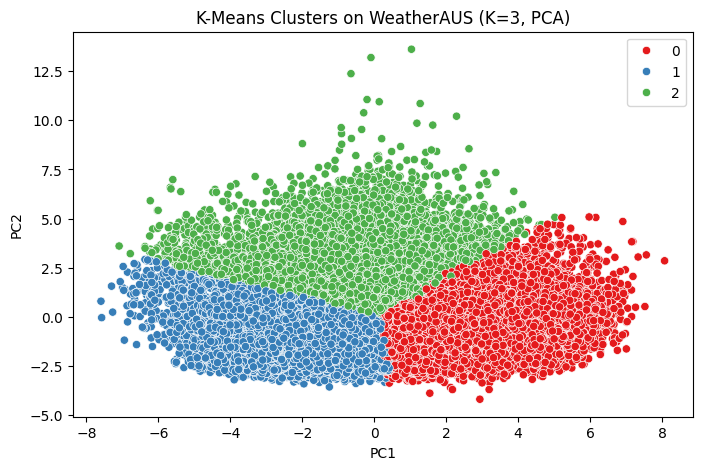

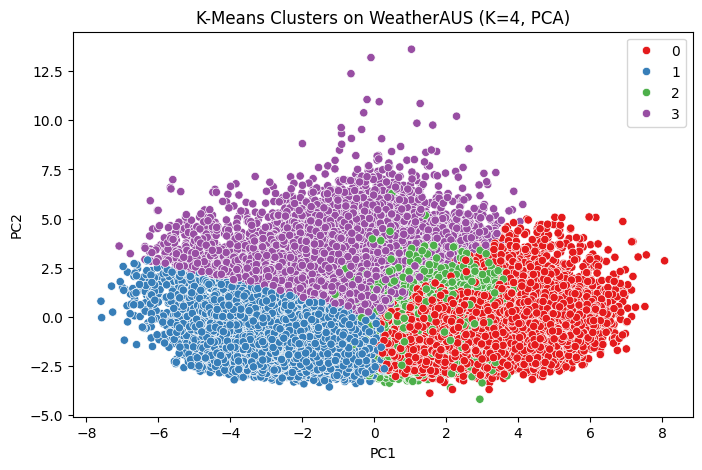

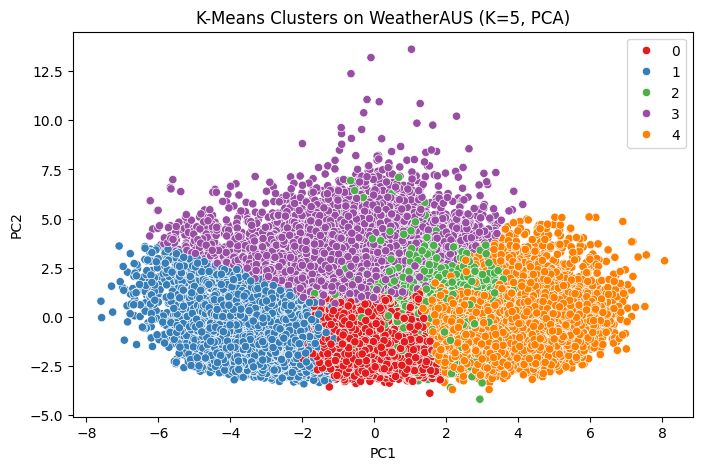

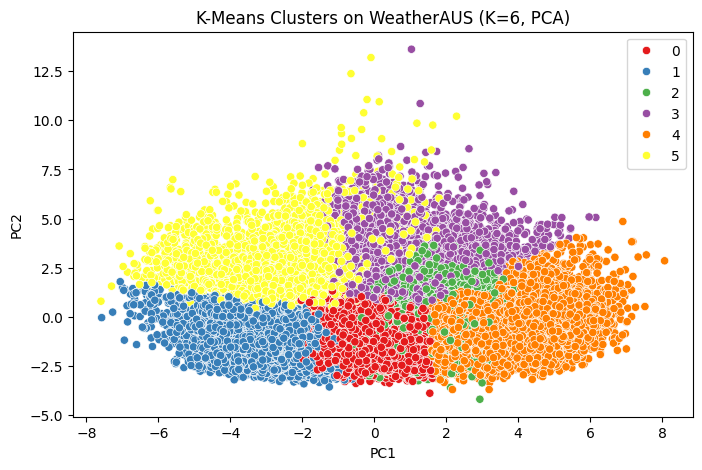

In [11]:
# Remove non-numeric columns and columns with too many missing values
weather = weather.select_dtypes(include=[np.number]).dropna(axis=1, thresh=int(0.9*len(weather)))
weather = weather.dropna()
weather_scaled = scaler.fit_transform(weather)
# Try K from 2 to 6
for k in range(2, 7):
    kmeans_weather = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans_weather.fit_predict(weather_scaled)
    pca_weather = pca.fit_transform(weather_scaled)
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=pca_weather[:,0], y=pca_weather[:,1], hue=clusters, palette='Set1', legend='full')
    plt.title(f'K-Means Clusters on WeatherAUS (K={k}, PCA)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


## Reflection: Legal, Social, Ethical, and Professional Issues

- Data privacy and consent: Are the datasets anonymized?
- Bias and fairness: Could clustering amplify biases?
- Professional responsibility: How do we communicate clustering results?

Discuss these points with your team.
